In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


In [118]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [119]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [120]:
df = df.drop('id', axis=1)
print(df.head())
df.info()

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column           

In [121]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

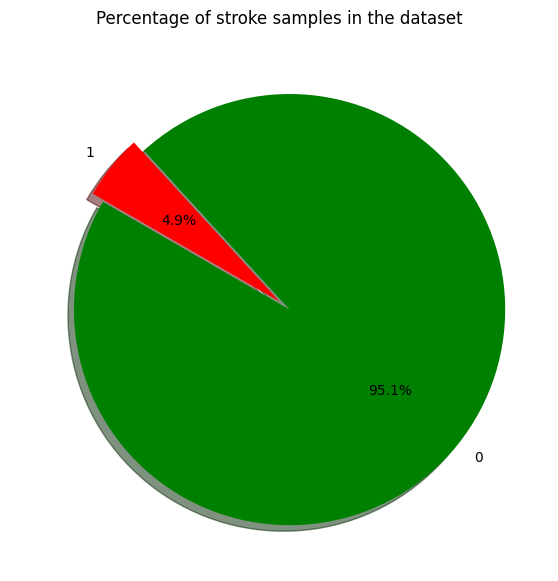

In [122]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["green","red"]
explode = (0.06,0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Percentage of stroke samples in the dataset')
plt.show()

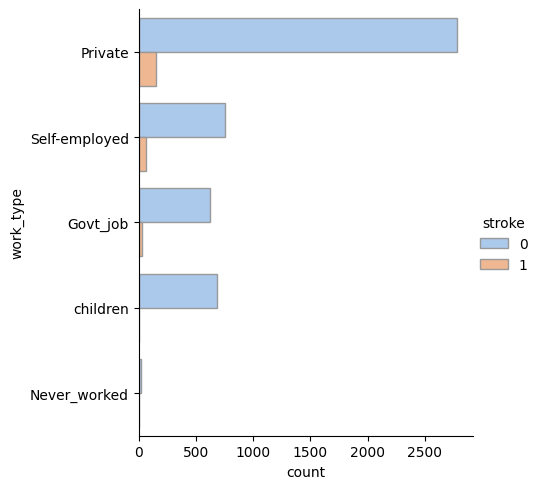

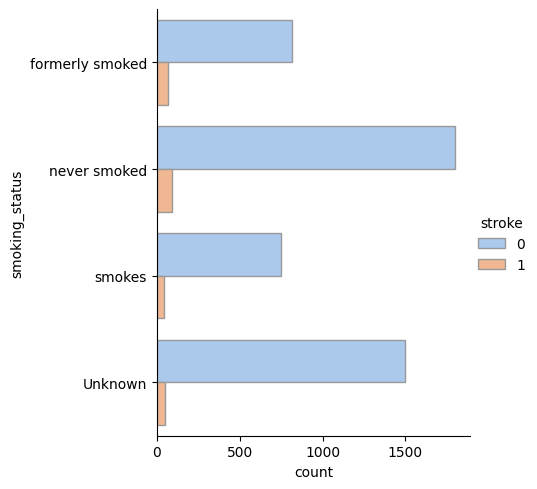

In [123]:
#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [124]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status','bmi','avg_glucose_level']

en_df_imputed = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imputed)


X , y = en_df_imputed[features],en_df_imputed["stroke"]


from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, counts of label '1': 4861
After OverSampling, counts of label '0': 4861


In [125]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             9722 non-null   int64
 1   age                9722 non-null   int64
 2   hypertension       9722 non-null   int64
 3   heart_disease      9722 non-null   int64
 4   ever_married       9722 non-null   int64
 5   work_type          9722 non-null   int64
 6   Residence_type     9722 non-null   int64
 7   smoking_status     9722 non-null   int64
 8   bmi                9722 non-null   int64
 9   avg_glucose_level  9722 non-null   int64
dtypes: int64(10)
memory usage: 759.7 KB


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<class 'sklearn.linear_model._logistic.LogisticRegression'>
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       967
           1       0.11      0.58      0.19        55

    accuracy                           0.73      1022
   macro avg       0.54      0.66      0.51      1022
weighted avg       0.92      0.73      0.80      1022

Validation Accuracy:  0.7250489236790607
Training Accuracy:  0.7421722113502935
----------------------------------------------------


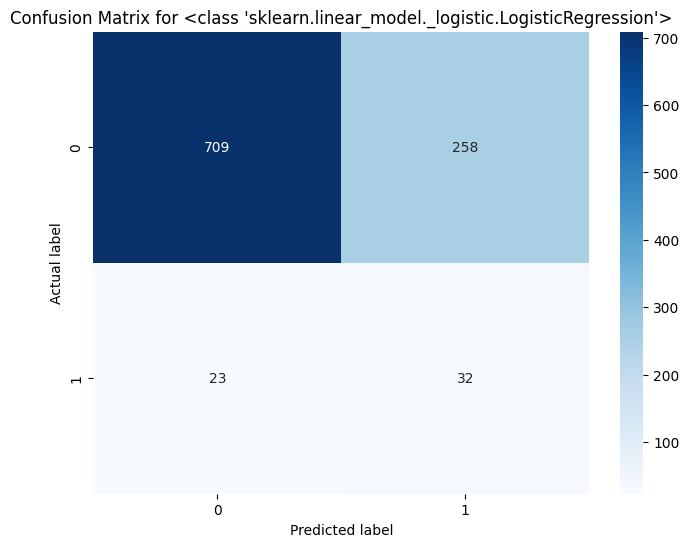

In [127]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_res, y_res)
model_pred = model.predict(x_test)
cm_model = confusion_matrix(y_test, model_pred)

print(LogisticRegression)
print(classification_report(y_test, model_pred))
print('Validation Accuracy: ', accuracy_score(y_test, model_pred))
print('Training Accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('----------------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {LogisticRegression}')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
    width=700, height=500
)
fig.add_shape(
    type='line', line={'dash':'dash'},
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       967
           1       1.00      1.00      1.00        55

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022

Validation Accuracy:  1.0
Training Accuracy:  1.0
----------------------------------------------------


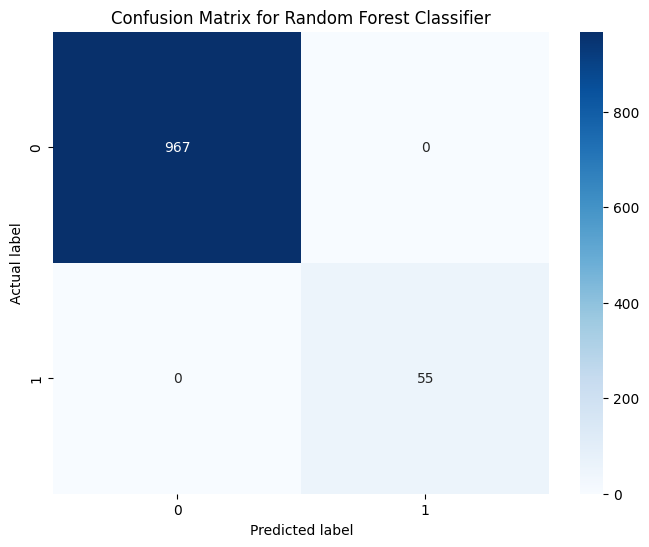

In [128]:
#Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_res, y_res)
model_pred = model.predict(x_test)
cm_model = confusion_matrix(y_test, model_pred)

print("Random Forest Classifier")
print(classification_report(y_test, model_pred))
print('Validation Accuracy: ', accuracy_score(y_test, model_pred))
print('Training Accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('----------------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {"Random Forest Classifier"}')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
    width=700, height=500
)
fig.add_shape(
    type='line', line={'dash':'dash'},
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       967
           1       0.11      0.62      0.19        55

    accuracy                           0.72      1022
   macro avg       0.54      0.67      0.51      1022
weighted avg       0.92      0.72      0.80      1022

Validation Accuracy:  0.723091976516634
Training Accuracy:  0.7448630136986302
----------------------------------------------------


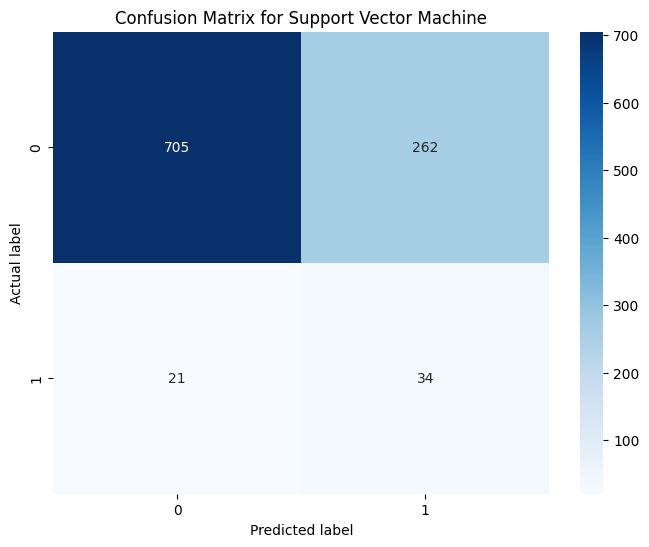

In [129]:
#Support Vector Machine
model = SVC(probability= True)
model.fit(X_res, y_res)
model_pred = model.predict(x_test)
cm_model = confusion_matrix(y_test, model_pred)

print("Support Vector Machine")
print(classification_report(y_test, model_pred))
print('Validation Accuracy: ', accuracy_score(y_test, model_pred))
print('Training Accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('----------------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {"Support Vector Machine"}')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
    width=700, height=500
)
fig.add_shape(
    type='line', line={'dash':'dash'},
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

XG Boost
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       967
           1       0.65      0.95      0.77        55

    accuracy                           0.97      1022
   macro avg       0.82      0.96      0.88      1022
weighted avg       0.98      0.97      0.97      1022

Validation Accuracy:  0.9696673189823874
Training Accuracy:  0.9755381604696673
----------------------------------------------------


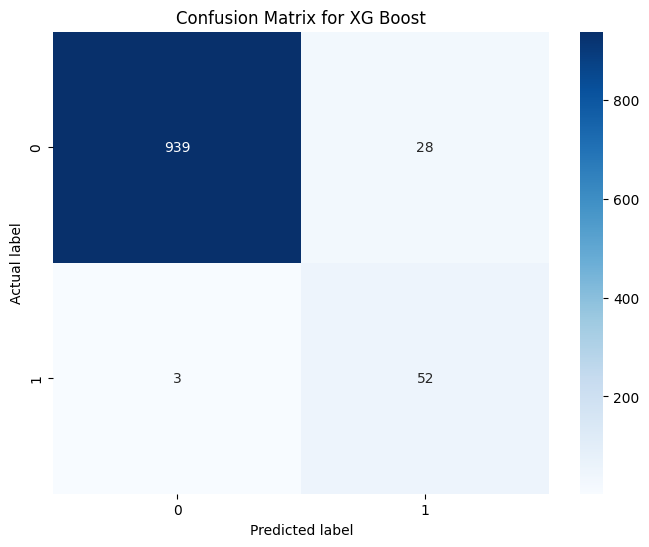

In [130]:
#XG Boost Classifier
model = XGBClassifier()
model.fit(X_res, y_res)
model_pred = model.predict(x_test)
cm_model = confusion_matrix(y_test, model_pred)

print("XG Boost")
print(classification_report(y_test, model_pred))
print('Validation Accuracy: ', accuracy_score(y_test, model_pred))
print('Training Accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('----------------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {"XG Boost"}')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
    width=700, height=500
)
fig.add_shape(
    type='line', line={'dash':'dash'},
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()